Text(0.5, 1.0, 'Test')

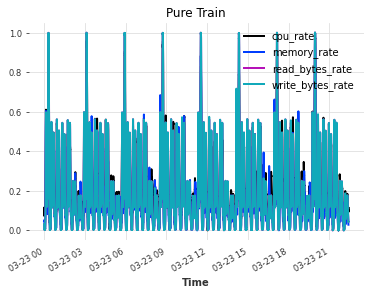

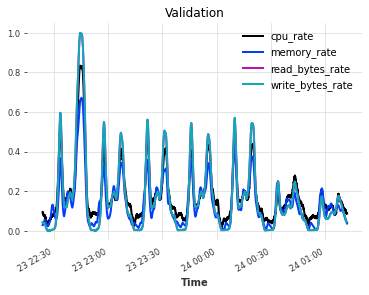

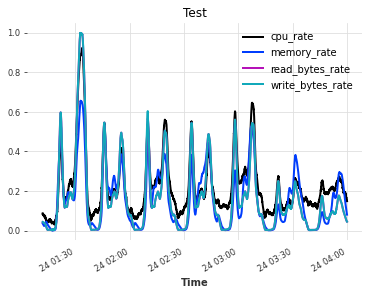

In [1]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["LD_LIBRARY_PATH"] = "/home/jupyter-babakesistani/.conda/envs/thesis/lib/"


import torch
import numpy as np
import random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.use_deterministic_algorithms(True)
np.random.seed(seed)

import sys
sys.path.append("/home/jupyter-babakesistani/adaptive-monitoring-nn/")
from pipeline.dataset.dataset_loader import DatasetLoader
import pandas as pd
from darts.models import (
    BlockRNNModel,
)
from darts.utils.likelihood_models import QuantileRegression
from darts.dataprocessing.transformers import Scaler
import matplotlib.pyplot as plt
from darts.metrics import rho_risk
import matplotlib.pyplot as plt
import tsaug
import ray
from ray import tune

from matplotlib.pyplot import figure


dl =  DatasetLoader( '/home/jupyter-babakesistani/adaptive-monitoring-nn/pipeline/data/cpu_memory_disk_23_march.csv', "Time",
                                                                    [
                                                                      "cpu_rate",
                                                                      "memory_rate",
                                                                      "read_bytes_rate",
                                                                      "write_bytes_rate"
                                                                     ],
                    augment=False, resample_freq="1s", shift_df_datetime="2022-03-23 00:00:00")

scaled_one_day = 24*60
scaled_one_week = 7*24*60
idx_train = 8*scaled_one_week
idx_val = 9*scaled_one_week
train = dl.series_scaled[:idx_train]
val = dl.series_scaled[idx_train:idx_val]
test = dl.series_scaled[idx_val:-1]
    
train.plot()
plt.title("Pure Train")

val.plot(new_plot=True)
plt.title("Validation")

Text(0.5, 1.0, ' test')

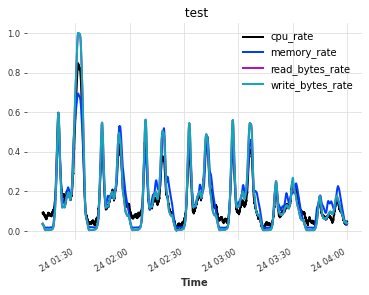

In [2]:
from darts import TimeSeries
dl_test =  DatasetLoader( '/home/jupyter-babakesistani/adaptive-monitoring-nn/pipeline/data/test_23_march.csv', "Time",
                                                                    [
                                                                      "cpu_rate",
                                                                      "memory_rate",
                                                                      "read_bytes_rate",
                                                                      "write_bytes_rate"
                                                                     ],
                    augment=False, resample_freq="1s", shift_df_datetime="2022-03-24 01:12:00")


test_df = dl_test.darts_df
test_series = TimeSeries.from_dataframe(test_df, dl_test.time_col, dl_test.target_cols)
test_series = dl.scaler.transform(test_series)

test = test_series
    
test.plot()
plt.title(" test")

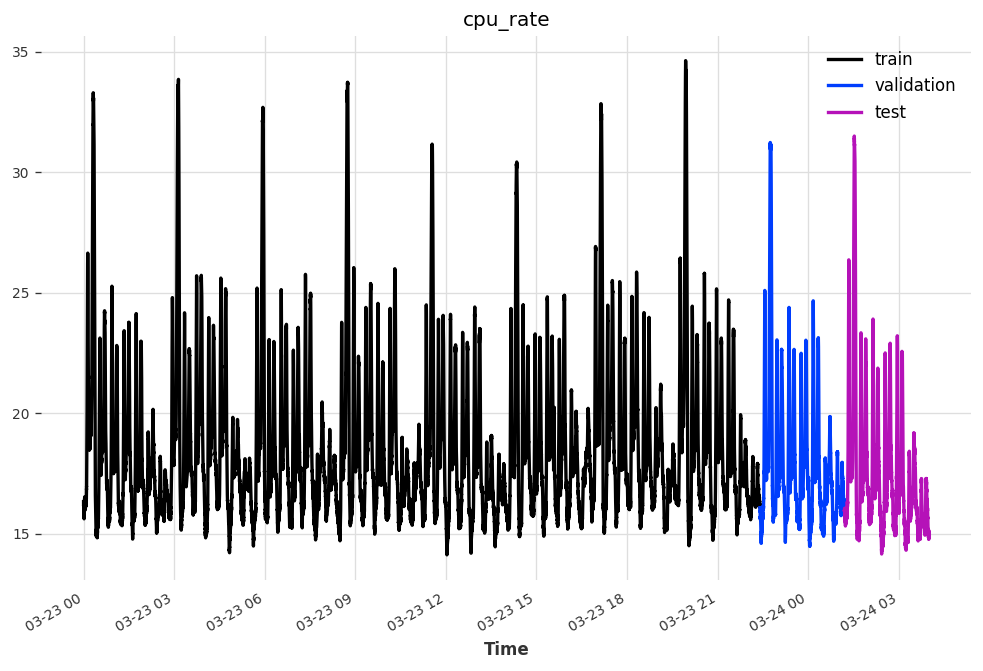

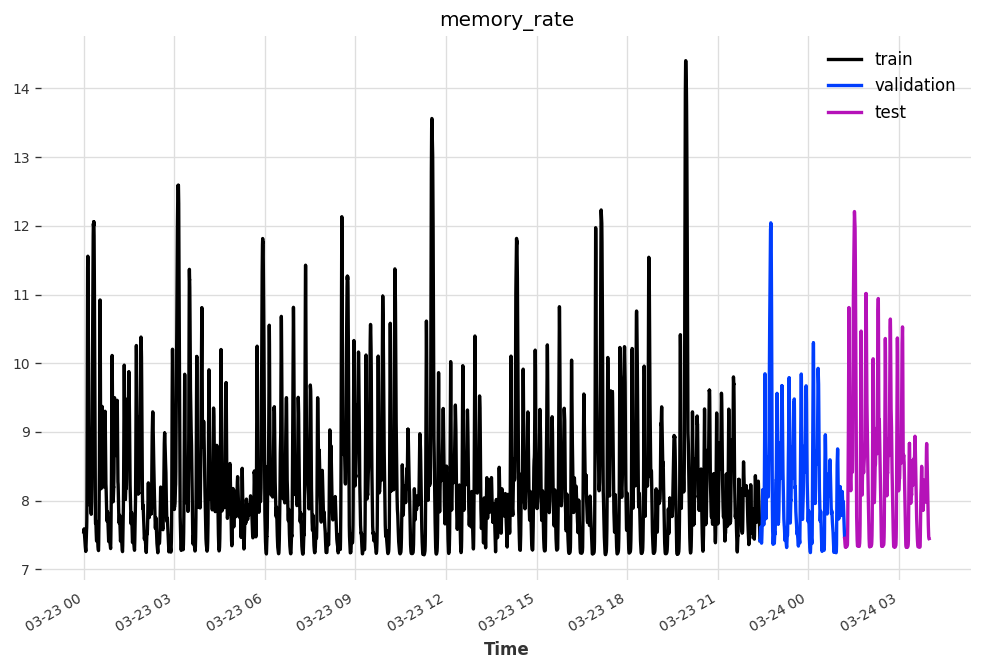

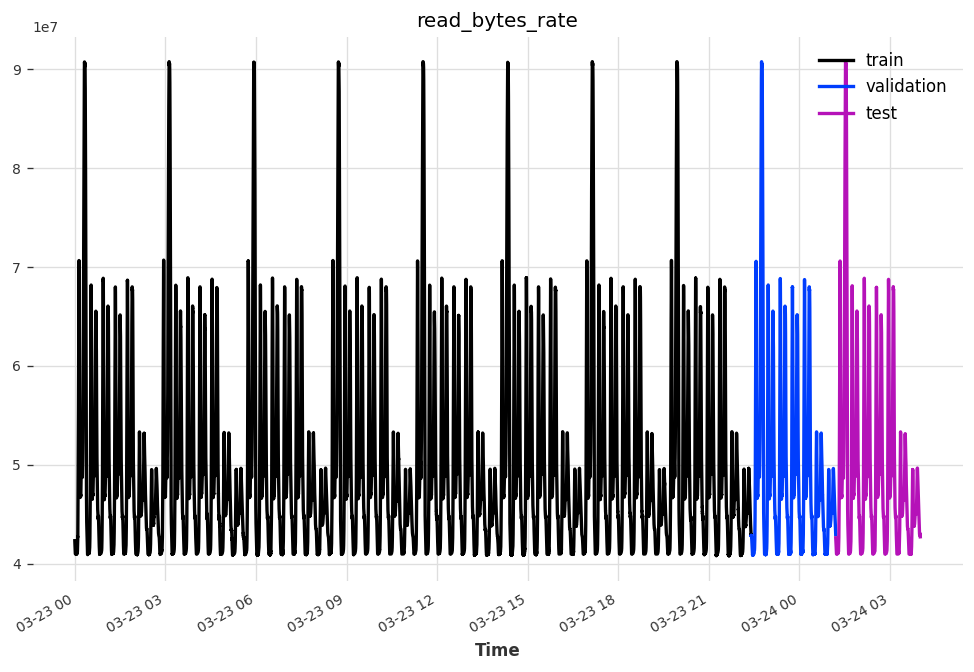

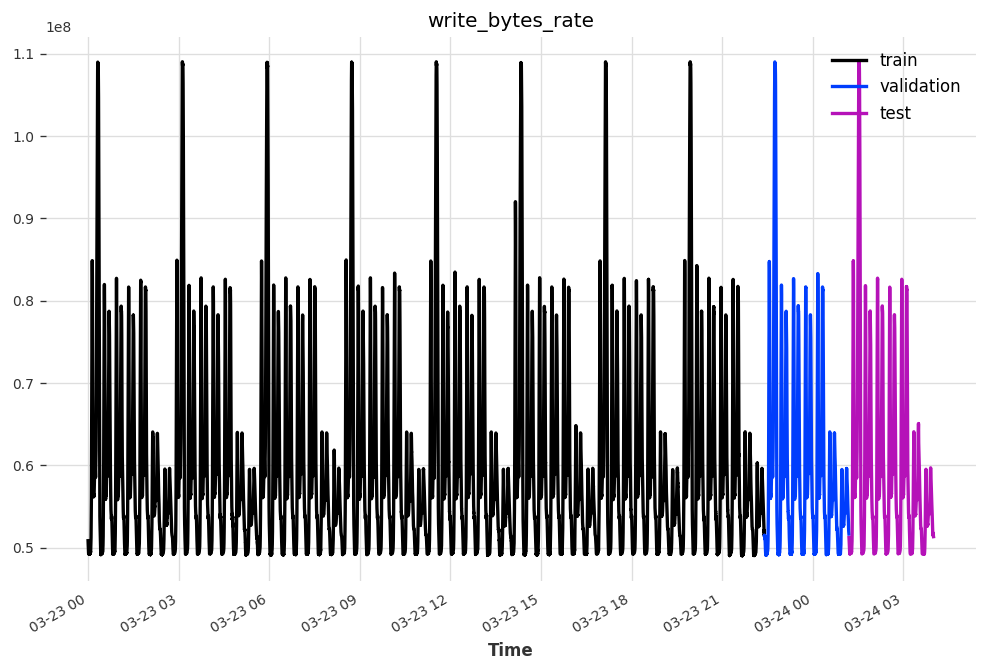

In [8]:

cols = train.components.tolist()
for col_name in cols:
    figure(figsize=(10, 6), dpi=120)
    dl.scaler.inverse_transform(train)[col_name].plot(label="train")
    dl.scaler.inverse_transform(val)[col_name].plot(label="validation")
    dl.scaler.inverse_transform(test)[col_name].plot(label="test")
    plt.title(col_name)
    plt.legend(loc = "upper right")
    plt.show()